In [1]:
# # !pip install sklearn-deap
# # !pip install pycaret
# # !pip install --force scikit-learn==1.0.2
# # !pip install sklearn
# # !pip install numpy
# # # !pip uninstall -y sklearn
# # # !pip uninstall -y scikit-learn
# # !pip install --force numpy==1.19.5
# # # !pip uninstall -y scikit-learn
# # !pip install --force scikit-learn==0.23.2
#
# !pip uninstall --force -y numpy
# !pip install matplotlib
# !pip install pandas
# # !pip install sklearn
# !pip install keras
# # !pip install scikit-learn
# !pip install scikeras
#
# # !pip uninstall -y numpy
# #
# # !pip install numpy==1.23.0
#


In [2]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from pandas import Series

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, CuDNNLSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf

2023-07-03 16:21:45.509804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 16:21:45.953316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# print(tf.config.list_physical_devices('GPU'))
#
# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")

In [4]:
csv_path = 'inp/IBIRITE (ROLA MOCA)_MG.csv'

In [5]:
data = pd.read_csv(csv_path, sep=';')
data

,DATE,Chuva,$Pressão_{Inst}$,$Pressão_{Max}$,$Pressão_{Min}$,$Temperatura_{Inst}$,$Orvalho_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Orvalho_{Max}$,...,$Umidade_{Min}$,$Umidade_{Inst}$,$Vento_{Dir}$,$Vento_{Raj}$,$Vento_{Vel}$,GLOBAL,Latitude,Longitude,Altitude,Qo
0,2008-06-06,0.000000,886.500000,886.533333,886.300000,21.100000,10.500000,22.333333,20.900000,10.766667,...,48.333333,51.666667,56.333333,6.233333,3.133333,1.9223,-20.031457,-44.011249,1198.82,2.195897
1,2008-06-07,0.000000,887.037500,887.250000,886.854167,19.458333,10.083333,20.016667,18.770833,10.637500,...,54.000000,56.458333,76.458333,6.604167,3.537500,19.2513,-20.031457,-44.011249,1198.82,24.544495
2,2008-06-08,0.000000,886.783333,886.983333,886.583333,19.095833,10.504167,19.704167,18.458333,11.054167,...,55.458333,58.750000,79.791667,8.570833,4.383333,17.9175,-20.031457,-44.011249,1198.82,24.486118
3,2008-06-09,0.000000,886.341667,886.516667,886.204167,18.700000,12.312500,19.304167,18.079167,12.662500,...,64.541667,67.583333,125.875000,7.779167,4.033333,16.2483,-20.031457,-44.011249,1198.82,24.430901
4,2008-06-10,0.000000,885.012500,885.220833,884.820833,18.529167,11.920833,19.291667,17.795833,12.566667,...,64.916667,67.833333,139.625000,4.750000,2.329167,13.3562,-20.031457,-44.011249,1198.82,24.378872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2021-12-27,0.000000,880.675000,880.900000,880.425000,22.075000,14.425000,22.783333,21.395833,15.054167,...,60.291667,63.416667,174.083333,6.562500,1.462500,26.3813,-20.031457,-44.011249,1198.82,42.703244
4793,2021-12-28,0.983333,881.758333,882.012500,881.445833,21.458333,15.970833,22.525000,20.708333,16.695833,...,68.333333,72.875000,176.750000,7.200000,1.875000,23.1625,-20.031457,-44.011249,1198.82,42.712820
4794,2021-12-29,0.150000,883.337500,883.616667,883.075000,19.704167,16.345833,20.341667,19.187500,16.850000,...,78.791667,82.000000,131.375000,5.400000,0.254167,18.4593,-20.031457,-44.011249,1198.82,42.718808
4795,2021-12-30,1.008333,881.166667,881.458333,880.958333,18.454167,16.762500,18.820833,18.204167,17.050000,...,88.375000,89.875000,98.000000,5.812500,1.733333,5.3534,-20.031457,-44.011249,1198.82,42.721202


In [6]:
data.rename(columns={"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "Chuva",
                     "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": "$Pressão_{Inst}$",
                     "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)": "$Pressão_{Max}$",
                     "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)": "$Pressão_{Min}$",
                     "RADIACAO GLOBAL (KJ/m²)": "H",
                     "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "$Temperatura_{Inst}$",
                     "TEMPERATURA DO PONTO DE ORVALHO (°C)": "$Orvalho_{Inst}$",
                     "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)": "$Temperatura_{Max}$",
                     "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)": "$Temperatura_{Min}$",
                     "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)": "$Orvalho_{Max}$",
                     "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)": "$Orvalho_{Min}$",
                     "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)": "$Umidade_{Max}$",
                     "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)": "$Umidade_{Min}$",
                     "UMIDADE RELATIVA DO AR, HORARIA (%)": "$Umidade_{Inst}$",
                     "VENTO, DIREÇÃO HORARIA (gr) (° (gr))": "$Vento_{Dir}$",
                     "VENTO, RAJADA MAXIMA (m/s)": "$Vento_{Raj}$",
                     "VENTO, VELOCIDADE HORARIA (m/s)": "$Vento_{Vel}$",
                     "RADIACAO GLOBAL (Kj/m²)": "GLOBAL"}, inplace=True)
data

,DATE,Chuva,$Pressão_{Inst}$,$Pressão_{Max}$,$Pressão_{Min}$,$Temperatura_{Inst}$,$Orvalho_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Orvalho_{Max}$,...,$Umidade_{Min}$,$Umidade_{Inst}$,$Vento_{Dir}$,$Vento_{Raj}$,$Vento_{Vel}$,GLOBAL,Latitude,Longitude,Altitude,Qo
0,2008-06-06,0.000000,886.500000,886.533333,886.300000,21.100000,10.500000,22.333333,20.900000,10.766667,...,48.333333,51.666667,56.333333,6.233333,3.133333,1.9223,-20.031457,-44.011249,1198.82,2.195897
1,2008-06-07,0.000000,887.037500,887.250000,886.854167,19.458333,10.083333,20.016667,18.770833,10.637500,...,54.000000,56.458333,76.458333,6.604167,3.537500,19.2513,-20.031457,-44.011249,1198.82,24.544495
2,2008-06-08,0.000000,886.783333,886.983333,886.583333,19.095833,10.504167,19.704167,18.458333,11.054167,...,55.458333,58.750000,79.791667,8.570833,4.383333,17.9175,-20.031457,-44.011249,1198.82,24.486118
3,2008-06-09,0.000000,886.341667,886.516667,886.204167,18.700000,12.312500,19.304167,18.079167,12.662500,...,64.541667,67.583333,125.875000,7.779167,4.033333,16.2483,-20.031457,-44.011249,1198.82,24.430901
4,2008-06-10,0.000000,885.012500,885.220833,884.820833,18.529167,11.920833,19.291667,17.795833,12.566667,...,64.916667,67.833333,139.625000,4.750000,2.329167,13.3562,-20.031457,-44.011249,1198.82,24.378872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,2021-12-27,0.000000,880.675000,880.900000,880.425000,22.075000,14.425000,22.783333,21.395833,15.054167,...,60.291667,63.416667,174.083333,6.562500,1.462500,26.3813,-20.031457,-44.011249,1198.82,42.703244
4793,2021-12-28,0.983333,881.758333,882.012500,881.445833,21.458333,15.970833,22.525000,20.708333,16.695833,...,68.333333,72.875000,176.750000,7.200000,1.875000,23.1625,-20.031457,-44.011249,1198.82,42.712820
4794,2021-12-29,0.150000,883.337500,883.616667,883.075000,19.704167,16.345833,20.341667,19.187500,16.850000,...,78.791667,82.000000,131.375000,5.400000,0.254167,18.4593,-20.031457,-44.011249,1198.82,42.718808
4795,2021-12-30,1.008333,881.166667,881.458333,880.958333,18.454167,16.762500,18.820833,18.204167,17.050000,...,88.375000,89.875000,98.000000,5.812500,1.733333,5.3534,-20.031457,-44.011249,1198.82,42.721202


In [7]:
data.set_index('DATE', inplace=True)
data.dropna(axis=0, how='all', subset=None, inplace=True)
data.dropna(axis=1, how='all', subset=None, inplace=True)

In [8]:
#DEPENDENDO DO ANO E DA ESTAÇÃO OS VALORES DE RADIAÇÃO ESTÃO EM COLUNAS DIFERENTES
if 'GLOBAL' not in data.columns:
    data.rename(columns={"H": "GLOBAL"}, inplace=True)
if 'H' in data.columns:
    data['GLOBAL'].fillna(data['H'], inplace=True)
    data.drop(['H'], axis=1, inplace=True)

In [9]:
train_dates = pd.to_datetime(data.index)

data = data[
    ['$Temperatura_{Inst}$', '$Temperatura_{Max}$', '$Temperatura_{Min}$', '$Umidade_{Max}$', '$Umidade_{Min}$',
     '$Umidade_{Inst}$', 'GLOBAL']]

cols = list(data)[0:7]
data = data[cols].astype(float)
data

,$Temperatura_{Inst}$,$Temperatura_{Max}$,$Temperatura_{Min}$,$Umidade_{Max}$,$Umidade_{Min}$,$Umidade_{Inst}$,GLOBAL
DATE,,,,,,,
2008-06-06,21.100000,22.333333,20.900000,52.333333,48.333333,51.666667,1.9223
2008-06-07,19.458333,20.016667,18.770833,59.333333,54.000000,56.458333,19.2513
2008-06-08,19.095833,19.704167,18.458333,61.333333,55.458333,58.750000,17.9175
2008-06-09,18.700000,19.304167,18.079167,69.916667,64.541667,67.583333,16.2483
2008-06-10,18.529167,19.291667,17.795833,71.625000,64.916667,67.833333,13.3562
...,...,...,...,...,...,...,...
2021-12-27,22.075000,22.783333,21.395833,66.375000,60.291667,63.416667,26.3813
2021-12-28,21.458333,22.525000,20.708333,76.458333,68.333333,72.875000,23.1625
2021-12-29,19.704167,20.341667,19.187500,84.708333,78.791667,82.000000,18.4593


In [10]:
# GARANTINDO QUE TODOS OS DADOS ESTÃO SENDO TRATADOS COMO FLOAT
data = data.replace(',', '.', regex=True)
data['$Temperatura_{Inst}$'] = data['$Temperatura_{Inst}$'].astype(float)
data['$Temperatura_{Max}$'] = data['$Temperatura_{Max}$'].astype(float)
data['$Temperatura_{Min}$'] = data['$Temperatura_{Min}$'].astype(float)
data['GLOBAL'] = data['GLOBAL'].astype(float)

In [11]:
#DELETANDO ALGUMA LEITURA ONDE O MÁXIMO É MENOR QUE O MÍNIMO
delIndex = data.loc[(data['$Temperatura_{Max}$'] < data['$Temperatura_{Min}$']) | (
        data['$Umidade_{Max}$'] < data['$Umidade_{Min}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [12]:
#DELETANDO ALGUMA LEITURA ONDE O MÁXIMO É MENOR QUE O INSTANTÂNEO
delIndex = data.loc[(data['$Temperatura_{Max}$'] < data['$Temperatura_{Inst}$']) | (
        data['$Umidade_{Max}$'] < data['$Umidade_{Inst}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [13]:
#DELETANDO ALGUMA LEITURA ONDE O INSTANTÂNEO É MENOR QUE O MÍNIMO
delIndex = data.loc[(data['$Temperatura_{Inst}$'] < data['$Temperatura_{Min}$']) | (
        data['$Umidade_{Inst}$'] < data['$Umidade_{Min}$'])].index
if len(delIndex) > 0:
    data.drop(delIndex, axis=0, inplace=True)

In [14]:
# #MODIFICANDO A UNIDADE DA RADIAÇÃO DE (Kj/m²) PARA (Mj/m²)
data['GLOBAL'] = data['GLOBAL'].mul(0.001)

In [15]:
#DELETANDO ALGUMA LINHA QUE AINDA TENHA NAN
data.dropna(inplace=True)

In [16]:
# EXTRAINDO OS NOMES DAS COLUNAS
target_names = ['GLOBAL']
variable_names = data.columns.values
variable_names = np.delete(variable_names, np.where(variable_names == target_names))

In [17]:
date_range = data.index

var_to_plot = data.columns
df = data[var_to_plot]

n = int(df.shape[0] * 0.7)
df.index = range(df.shape[0])
id0 = df.index <= n
id1 = df.index > n
print(data.index)

# pl.rc('text', usetex=False)
# # pl.rc('font', family='serif',  serif='Times')
# pl.rc('xtick', labelsize=20)
# pl.rc('ytick', labelsize=20)
# fig=pl.figure(figsize=(18,24))
# for i,group in enumerate(data.columns):
#     sub=pl.subplot(len(data.columns), 1, i+1)
#     data[group].iloc[id0].plot( marker='', label='Training')#,fontsize=16,)#pyplot.plot(dataset[group].values)
#     data[group].iloc[id1].plot( marker='', label='Test')#,fontsize=16,)#pyplot.plot(dataset[group].values)
#     data[data.columns[i]].plot(marker='', lw=0)
# #         pl.axvline(n, color='k', ls='-.')
#     pl.ylabel(group,rotation = 0, fontsize=20,)
#     sub.yaxis.tick_right()#COLOCANDO OS TICKS NA DIREITA
#     sub.yaxis.set_label_coords(-0.05,0.5)#AJUSTANDO A POSIÇÃO DOS LABELS PARA NÃO SOBRESCREVER O PLOT
# fig.autofmt_xdate(rotation=30)

# pl.show()

Index(['2008-06-06', '2008-06-07', '2008-06-08', '2008-06-09', '2008-06-10',
       '2008-06-11', '2008-06-12', '2008-06-13', '2008-06-14', '2008-06-15',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='DATE', length=4797)


In [18]:
# import seaborn as sns

# df = X.copy()

# df[target_names] = y.values
# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = pl.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# cmap = cmap = "YlGnBu"
# sns.heatmap(corr, mask=mask, cmap=cmap,  #vmax=.3, center=0,
#             annot=True,  #fmt="d")
#             square=True, linewidths=.5,  #cbar_kws={"shrink": .5},
#             )
# pl.show()

In [19]:
X = data[variable_names]
y = data[target_names]

In [20]:
from sklearn.preprocessing import StandardScaler
# normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data = scaler.fit_transform(data)

# scaler = StandardScaler()
# scaler = scaler.fit(X)
# X = scaler.transform(X)
data

array([[ 0.15504838,  0.20013506,  0.22434721, ..., -0.28418803,
        -0.25979843, -0.98624192],
       [-0.04043662, -0.06972229, -0.03386684, ..., -0.13888889,
        -0.13101904,  0.13202141],
       [-0.08360208, -0.10612391, -0.07176518, ..., -0.10149573,
        -0.06942889,  0.04594953],
       ...,
       [-0.01116348, -0.03186461,  0.01666429, ...,  0.49679487,
         0.55543113,  0.0809126 ],
       [-0.16000992, -0.20901916, -0.10258917, ...,  0.74252137,
         0.76707727, -0.76482849],
       [-0.28603324, -0.33132861, -0.23295948, ...,  0.80555556,
         0.83538634, -0.61318633]])

In [21]:
print(X)

            $Temperatura_{Inst}$  $Temperatura_{Max}$  $Temperatura_{Min}$  \
DATE                                                                         
2008-06-06             21.100000            22.333333            20.900000   
2008-06-07             19.458333            20.016667            18.770833   
2008-06-08             19.095833            19.704167            18.458333   
2008-06-09             18.700000            19.304167            18.079167   
2008-06-10             18.529167            19.291667            17.795833   
...                          ...                  ...                  ...   
2021-12-27             22.075000            22.783333            21.395833   
2021-12-28             21.458333            22.525000            20.708333   
2021-12-29             19.704167            20.341667            19.187500   
2021-12-30             18.454167            18.820833            18.204167   
2021-12-31             17.395833            17.770833           

In [22]:
from sklearn.model_selection import train_test_split

train_x = []
train_y = []

n_future = 1
n_past = 3

for i in range(n_past, len(data) - n_future + 1):
    train_x.append(data[i - n_past:i, 0:data.shape[1]])
    train_y.append(data[i + n_future - 1:i + n_future, 0])

train_x = np.array(train_x)
train_y = np.array(train_y)

# Separar os dados em conjuntos de treinamento e teste
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=42)

print("Shape de train_x:", train_x.shape)
print("Shape de train_y:", train_y.shape)
print("Shape de test_x:", test_x.shape)
print("Shape de test_y:", test_y.shape)



Shape de train_x: (4074, 3, 7)
Shape de train_y: (4074, 1)
Shape de test_x: (720, 3, 7)
Shape de test_y: (720, 1)


In [23]:
# # split the data for training and test, for training a want 70% of the data, and i need split the data in n_past_days=3 and n_future_days=1
#
# n_past = 3
# n_future = 1
#
# total_samples = len(X)
# n_samples = total_samples - (n_past - n_future) + 1
#
# train_size = int(n_samples * 0.7)
# train_x, test_x = X[:train_size], X[train_size:]
# train_y, test_y = y[:train_size], y[train_size:]
#
# # reshape
# train_x = [train_x[i:i + n_past] for i in range(train_size - n_past + 1)]
# test_x = [test_x[i:i + n_past] for i in range(len(test_x) - n_past + 1)]
# train_y = train_y[n_past - 1:train_size + n_future - 1]
# test_y = test_y[n_past - 1:]
#
# train_x, train_y = np.array(train_x), np.array(train_y)
# test_x, test_y = np.array(test_x), np.array(test_y)
#
# train_x.shape, train_y.shape, test_x.shape, test_y.shape

In [24]:
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error, RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam
#
# params = {
#     'batch_size': [32],
#     'epochs': [100],
#     'optimizer': ['adam'],
#     'learning_rate': [0.01],
#     'activation': ['relu'],
#     'dropout': [0.1],
#     'neurons': [5]
# }
#
#
# def create_model(learning_rate=0.1, optimizer='adam', activation='relu', dropout=0.1, neurons=1):
#     model1 = Sequential()
#     model1.add(CuDNNLSTM(neurons, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=False))
#     # model1.add(Dropout(dropout))
#     model1.add(Dense(train_y.shape[1]))
#     model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate),
#                    metrics=[RootMeanSquaredError()])
#     return model1
#
#
# from scikeras.wrappers import KerasRegressor
# from evolutionary_search import EvolutionaryAlgorithmSearchCV
#
# model = KerasRegressor(model=create_model, verbose=2, learning_rate=[0.01], activation=['relu'],
#                        dropout=[0.1], neurons=[5])
#
# # define checkpoint callback
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#
# eas = EvolutionaryAlgorithmSearchCV(estimator=model,
#                                     params=params,
#                                     scoring='neg_mean_squared_error',
#                                     cv=3,
#                                     verbose=1,
#                                     population_size=50,
#                                     gene_mutation_prob=0.01,
#                                     gene_crossover_prob=0.8,
#                                     tournament_size=3,
#                                     generations_number=5)
#
# eas.fit(train_x, train_y)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
from scikeras.wrappers import KerasRegressor
from evolutionary_search import EvolutionaryAlgorithmSearchCV

params = {
    'batch_size': [1024],
    'epochs': [100, 200],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.01, 0.001],
    'activation': ['relu', 'sigmoid'],
    'dropout': [0.2, 0.4],
    'neurons': [32, 64]
}


def create_model(learning_rate=0.1, optimizer='adam', activation='relu', dropout=0.1, neurons=1):
    model1 = Sequential()
    model1.add(CuDNNLSTM(neurons, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
    model1.add(CuDNNLSTM(int(neurons/2), return_sequences=False))
    model1.add(Dense(train_y.shape[1]))
    model1.add(Dropout(dropout))
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    model1.compile(loss=MeanSquaredError(), optimizer=optimizer,
                   metrics=[RootMeanSquaredError()])
    return model1


model = KerasRegressor(model=create_model, verbose=2, learning_rate=[0.01, 0.001], activation=['relu', 'sigmoid'],
                       dropout=[0.2, 0.4], neurons=[32, 64])

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

eas = EvolutionaryAlgorithmSearchCV(estimator=model,
                                    params=params,
                                    scoring='neg_mean_squared_error',
                                    cv=3,
                                    verbose=1,
                                    population_size=50,
                                    gene_mutation_prob=0.01,
                                    gene_crossover_prob=0.8,
                                    tournament_size=3,
                                    generations_number=15)

# Enable graph execution mode
tf.config.run_functions_eagerly(True)
# tf.config.run_functions_eagerly(False)

# Fit the model
eas.fit(train_x, train_y)

Types [1, 1, 1, 2, 1, 2, 1] and maxint [0, 1, 1, 1, 1, 1, 1] detected
--- Evolve in 64 possible combinations ---


2023-07-03 16:21:46.818574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-03 16:21:46.846866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-03 16:21:46.846934: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-03 16:21:46.849267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-03 16:21:46.849319: I tensorflow/compile

Epoch 1/200


/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
2023-07-03 16:21:48.842256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-03 16:21:49.129936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3/3 - 1s - loss: 0.0673 - root_mean_squared_error: 0.2593 - 1s/epoch - 444ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0561 - root_mean_squared_error: 0.2368 - 176ms/epoch - 59ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0505 - root_mean_squared_error: 0.2247 - 151ms/epoch - 50ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0426 - root_mean_squared_error: 0.2065 - 164ms/epoch - 55ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0415 - root_mean_squared_error: 0.2038 - 178ms/epoch - 59ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0391 - root_mean_squared_error: 0.1979 - 160ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0362 - root_mean_squared_error: 0.1901 - 179ms/epoch - 60ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0364 - root_mean_squared_error: 0.1907 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0356 - root_mean_squared_error: 0.1887 - 160ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0336 - root_mean_squared_error: 0.1832 - 151ms/epoch - 50ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0340 - root_mean_squa

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/200
3/3 - 0s - loss: 0.0716 - root_mean_squared_error: 0.2677 - 185ms/epoch - 62ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2202 - 166ms/epoch - 55ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0448 - root_mean_squared_error: 0.2116 - 158ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0406 - root_mean_squared_error: 0.2014 - 160ms/epoch - 53ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0385 - root_mean_squared_error: 0.1961 - 172ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0349 - root_mean_squared_error: 0.1868 - 161ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0336 - root_mean_squared_error: 0.1834 - 164ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0350 - root_mean_squared_error: 0.1871 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0323 - root_mean_squared_error: 0.1798 - 153ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0327 - root_mean_squared_error: 0.1808 - 165ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0300 - 

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0770 - root_mean_squared_error: 0.2774 - 190ms/epoch - 63ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0491 - root_mean_squared_error: 0.2215 - 169ms/epoch - 56ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0466 - root_mean_squared_error: 0.2159 - 176ms/epoch - 59ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0428 - root_mean_squared_error: 0.2068 - 182ms/epoch - 61ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0379 - root_mean_squared_error: 0.1947 - 165ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0377 - root_mean_squared_error: 0.1940 - 164ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0384 - root_mean_squared_error: 0.1959 - 162ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0334 - root_mean_squared_error: 0.1828 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0346 - root_mean_squared_error: 0.1860 - 153ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0328 - root_mean_squared_error: 0.1810 - 161ms/epoch - 54ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0325 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0793 - root_mean_squared_error: 0.2816 - 172ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0715 - root_mean_squared_error: 0.2674 - 173ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0651 - root_mean_squared_error: 0.2552 - 184ms/epoch - 61ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0589 - root_mean_squared_error: 0.2426 - 171ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2351 - 181ms/epoch - 60ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0507 - root_mean_squared_error: 0.2251 - 183ms/epoch - 61ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0475 - root_mean_squared_error: 0.2178 - 194ms/epoch - 65ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0448 - root_mean_squared_error: 0.2117 - 168ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2156 - 189ms/epoch - 63ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 165ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0468 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0722 - root_mean_squared_error: 0.2686 - 169ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0643 - root_mean_squared_error: 0.2537 - 180ms/epoch - 60ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2391 - 161ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0508 - root_mean_squared_error: 0.2255 - 176ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0479 - root_mean_squared_error: 0.2190 - 176ms/epoch - 59ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2144 - 162ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0468 - root_mean_squared_error: 0.2163 - 191ms/epoch - 64ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0448 - root_mean_squared_error: 0.2117 - 165ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0442 - root_mean_squared_error: 0.2102 - 180ms/epoch - 60ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0446 - root_mean_squared_error: 0.2112 - 174ms/epoch - 58ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0443 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0771 - root_mean_squared_error: 0.2776 - 206ms/epoch - 69ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0694 - root_mean_squared_error: 0.2635 - 177ms/epoch - 59ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0630 - root_mean_squared_error: 0.2510 - 172ms/epoch - 57ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0575 - root_mean_squared_error: 0.2397 - 180ms/epoch - 60ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0532 - root_mean_squared_error: 0.2306 - 178ms/epoch - 59ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2198 - 196ms/epoch - 65ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2155 - 171ms/epoch - 57ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0444 - root_mean_squared_error: 0.2107 - 173ms/epoch - 58ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2125 - 193ms/epoch - 64ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0445 - root_mean_squared_error: 0.2110 - 170ms/epoch - 57ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0448 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0708 - root_mean_squared_error: 0.2660 - 190ms/epoch - 63ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0629 - root_mean_squared_error: 0.2507 - 162ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0573 - root_mean_squared_error: 0.2394 - 286ms/epoch - 95ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0525 - root_mean_squared_error: 0.2292 - 200ms/epoch - 67ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2223 - 181ms/epoch - 60ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2209 - 176ms/epoch - 59ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 178ms/epoch - 59ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0477 - root_mean_squared_error: 0.2184 - 163ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0471 - root_mean_squared_error: 0.2170 - 179ms/epoch - 60ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0448 - root_mean_squared_error: 0.2117 - 169ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0455 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0801 - root_mean_squared_error: 0.2830 - 165ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0732 - root_mean_squared_error: 0.2705 - 159ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0661 - root_mean_squared_error: 0.2572 - 152ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0602 - root_mean_squared_error: 0.2453 - 163ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0557 - root_mean_squared_error: 0.2359 - 158ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2259 - 163ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2144 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2136 - 158ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 161ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2137 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0428 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0857 - root_mean_squared_error: 0.2928 - 171ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0765 - root_mean_squared_error: 0.2766 - 166ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0694 - root_mean_squared_error: 0.2635 - 161ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0627 - root_mean_squared_error: 0.2503 - 177ms/epoch - 59ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2286 - 158ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0490 - root_mean_squared_error: 0.2213 - 160ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0473 - root_mean_squared_error: 0.2175 - 169ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2137 - 172ms/epoch - 57ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0449 - root_mean_squared_error: 0.2119 - 169ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0440 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0858 - root_mean_squared_error: 0.2930 - 368ms/epoch - 123ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0800 - root_mean_squared_error: 0.2828 - 161ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0771 - root_mean_squared_error: 0.2776 - 158ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0731 - root_mean_squared_error: 0.2704 - 161ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0693 - root_mean_squared_error: 0.2632 - 165ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0650 - root_mean_squared_error: 0.2549 - 163ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0631 - root_mean_squared_error: 0.2511 - 162ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0613 - root_mean_squared_error: 0.2475 - 162ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0574 - root_mean_squared_error: 0.2396 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0568 - root_mean_squared_error: 0.2383 - 167ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0570 - root_mean_s

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
3/3 - 0s - loss: 0.0660 - root_mean_squared_error: 0.2569 - 166ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0628 - root_mean_squared_error: 0.2505 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0604 - root_mean_squared_error: 0.2458 - 277ms/epoch - 92ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0561 - root_mean_squared_error: 0.2369 - 160ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0552 - root_mean_squared_error: 0.2351 - 165ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0552 - root_mean_squared_error: 0.2350 - 153ms/epoch - 51ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2355 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0542 - root_mean_squared_error: 0.2328 - 160ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2297 - 151ms/epoch - 50ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2326 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0537 - 

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0936 - root_mean_squared_error: 0.3059 - 181ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0848 - root_mean_squared_error: 0.2913 - 165ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0776 - root_mean_squared_error: 0.2785 - 152ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0722 - root_mean_squared_error: 0.2687 - 166ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0673 - root_mean_squared_error: 0.2594 - 162ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0623 - root_mean_squared_error: 0.2495 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0598 - root_mean_squared_error: 0.2446 - 187ms/epoch - 62ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0579 - root_mean_squared_error: 0.2406 - 181ms/epoch - 60ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2376 - 176ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2359 - 175ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0544 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0803 - root_mean_squared_error: 0.2834 - 166ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0730 - root_mean_squared_error: 0.2702 - 151ms/epoch - 50ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0668 - root_mean_squared_error: 0.2585 - 166ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0601 - root_mean_squared_error: 0.2452 - 158ms/epoch - 53ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2391 - 153ms/epoch - 51ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0564 - root_mean_squared_error: 0.2374 - 156ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2364 - 161ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0564 - root_mean_squared_error: 0.2375 - 155ms/epoch - 52ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0567 - root_mean_squared_error: 0.2381 - 158ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2333 - 161ms/epoch - 54ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0540 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0776 - root_mean_squared_error: 0.2785 - 169ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0693 - root_mean_squared_error: 0.2633 - 161ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0625 - root_mean_squared_error: 0.2501 - 156ms/epoch - 52ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0580 - root_mean_squared_error: 0.2409 - 156ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 156ms/epoch - 52ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2333 - 168ms/epoch - 56ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2323 - 154ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2334 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2331 - 160ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0526 - root_mean_squared_error: 0.2293 - 154ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0527 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0885 - root_mean_squared_error: 0.2975 - 179ms/epoch - 60ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0785 - root_mean_squared_error: 0.2801 - 175ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0715 - root_mean_squared_error: 0.2673 - 158ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0645 - root_mean_squared_error: 0.2539 - 162ms/epoch - 54ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0606 - root_mean_squared_error: 0.2461 - 185ms/epoch - 62ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0560 - root_mean_squared_error: 0.2367 - 159ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2341 - 168ms/epoch - 56ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2327 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2326 - 156ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0542 - root_mean_squared_error: 0.2328 - 158ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0541 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0765 - root_mean_squared_error: 0.2767 - 162ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0641 - root_mean_squared_error: 0.2532 - 157ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0574 - root_mean_squared_error: 0.2395 - 151ms/epoch - 50ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0522 - root_mean_squared_error: 0.2285 - 165ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0526 - root_mean_squared_error: 0.2293 - 156ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0517 - root_mean_squared_error: 0.2274 - 163ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2234 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2141 - 160ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0480 - root_mean_squared_error: 0.2192 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2121 - 151ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0464 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0767 - root_mean_squared_error: 0.2769 - 183ms/epoch - 61ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0635 - root_mean_squared_error: 0.2519 - 161ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2391 - 167ms/epoch - 56ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0505 - root_mean_squared_error: 0.2247 - 172ms/epoch - 57ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0514 - root_mean_squared_error: 0.2267 - 171ms/epoch - 57ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2203 - 183ms/epoch - 61ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0474 - root_mean_squared_error: 0.2176 - 164ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0466 - root_mean_squared_error: 0.2159 - 175ms/epoch - 58ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0438 - root_mean_squared_error: 0.2092 - 168ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0439 - root_mean_squared_error: 0.2095 - 173ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0423 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0778 - root_mean_squared_error: 0.2788 - 165ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0629 - root_mean_squared_error: 0.2508 - 155ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2385 - 154ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2270 - 153ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2229 - 150ms/epoch - 50ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2269 - 151ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0492 - root_mean_squared_error: 0.2217 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2141 - 150ms/epoch - 50ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2151 - 148ms/epoch - 49ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0448 - root_mean_squared_error: 0.2117 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0484 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0751 - root_mean_squared_error: 0.2740 - 180ms/epoch - 60ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0699 - root_mean_squared_error: 0.2644 - 161ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0654 - root_mean_squared_error: 0.2557 - 169ms/epoch - 56ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0607 - root_mean_squared_error: 0.2464 - 167ms/epoch - 56ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0582 - root_mean_squared_error: 0.2413 - 162ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2346 - 159ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2288 - 157ms/epoch - 52ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2230 - 150ms/epoch - 50ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2194 - 160ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2155 - 166ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0453 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0828 - root_mean_squared_error: 0.2877 - 169ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0776 - root_mean_squared_error: 0.2785 - 177ms/epoch - 59ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0726 - root_mean_squared_error: 0.2695 - 156ms/epoch - 52ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0681 - root_mean_squared_error: 0.2609 - 155ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0634 - root_mean_squared_error: 0.2518 - 169ms/epoch - 56ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0597 - root_mean_squared_error: 0.2443 - 170ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2352 - 163ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2296 - 166ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0503 - root_mean_squared_error: 0.2244 - 157ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2166 - 164ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0476 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0789 - root_mean_squared_error: 0.2810 - 168ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - 158ms/epoch - 53ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0696 - root_mean_squared_error: 0.2638 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0653 - root_mean_squared_error: 0.2555 - 168ms/epoch - 56ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0617 - root_mean_squared_error: 0.2485 - 172ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0583 - root_mean_squared_error: 0.2415 - 157ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0558 - root_mean_squared_error: 0.2362 - 175ms/epoch - 58ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0520 - root_mean_squared_error: 0.2280 - 155ms/epoch - 52ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0490 - root_mean_squared_error: 0.2214 - 166ms/epoch - 55ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0466 - root_mean_squared_error: 0.2160 - 164ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0464 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0784 - root_mean_squared_error: 0.2800 - 173ms/epoch - 58ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2440 - 171ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2376 - 170ms/epoch - 57ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0503 - root_mean_squared_error: 0.2243 - 165ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0526 - root_mean_squared_error: 0.2294 - 165ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2212 - 187ms/epoch - 62ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0506 - root_mean_squared_error: 0.2250 - 163ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0479 - root_mean_squared_error: 0.2189 - 176ms/epoch - 59ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0466 - root_mean_squared_error: 0.2158 - 167ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2155 - 164ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0466 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0763 - root_mean_squared_error: 0.2763 - 157ms/epoch - 52ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0560 - root_mean_squared_error: 0.2366 - 157ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2269 - 149ms/epoch - 50ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0502 - root_mean_squared_error: 0.2241 - 162ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0513 - root_mean_squared_error: 0.2265 - 163ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2195 - 166ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2133 - 158ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2153 - 166ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0439 - root_mean_squared_error: 0.2094 - 168ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0427 - root_mean_squared_error: 0.2067 - 168ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0428 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - 178ms/epoch - 59ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0620 - root_mean_squared_error: 0.2490 - 161ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2325 - 165ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2296 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0524 - root_mean_squared_error: 0.2289 - 190ms/epoch - 63ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2257 - 165ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0471 - root_mean_squared_error: 0.2170 - 175ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2152 - 159ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2143 - 170ms/epoch - 57ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0442 - root_mean_squared_error: 0.2102 - 162ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0476 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0738 - root_mean_squared_error: 0.2716 - 160ms/epoch - 53ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2352 - 164ms/epoch - 55ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0478 - root_mean_squared_error: 0.2187 - 165ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2140 - 152ms/epoch - 51ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2135 - 166ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0420 - root_mean_squared_error: 0.2049 - 171ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0421 - root_mean_squared_error: 0.2053 - 154ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0394 - root_mean_squared_error: 0.1985 - 159ms/epoch - 53ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0393 - root_mean_squared_error: 0.1982 - 179ms/epoch - 60ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0377 - root_mean_squared_error: 0.1942 - 159ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0361 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0758 - root_mean_squared_error: 0.2753 - 182ms/epoch - 61ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0512 - root_mean_squared_error: 0.2263 - 160ms/epoch - 53ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2167 - 163ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0436 - root_mean_squared_error: 0.2089 - 154ms/epoch - 51ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0403 - root_mean_squared_error: 0.2007 - 164ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0391 - root_mean_squared_error: 0.1977 - 151ms/epoch - 50ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0382 - root_mean_squared_error: 0.1954 - 160ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0363 - root_mean_squared_error: 0.1905 - 170ms/epoch - 57ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0346 - root_mean_squared_error: 0.1861 - 157ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0326 - root_mean_squared_error: 0.1806 - 153ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0344 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0846 - root_mean_squared_error: 0.2909 - 174ms/epoch - 58ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0529 - root_mean_squared_error: 0.2299 - 158ms/epoch - 53ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2167 - 170ms/epoch - 57ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0443 - root_mean_squared_error: 0.2106 - 172ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0402 - root_mean_squared_error: 0.2005 - 169ms/epoch - 56ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0399 - root_mean_squared_error: 0.1997 - 174ms/epoch - 58ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0395 - root_mean_squared_error: 0.1988 - 178ms/epoch - 59ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0356 - root_mean_squared_error: 0.1886 - 174ms/epoch - 58ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0354 - root_mean_squared_error: 0.1882 - 168ms/epoch - 56ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0331 - root_mean_squared_error: 0.1820 - 161ms/epoch - 54ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0344 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0700 - root_mean_squared_error: 0.2645 - 162ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0611 - root_mean_squared_error: 0.2472 - 156ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2365 - 152ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0547 - root_mean_squared_error: 0.2340 - 153ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0528 - root_mean_squared_error: 0.2298 - 157ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0511 - root_mean_squared_error: 0.2260 - 160ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2256 - 167ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0496 - root_mean_squared_error: 0.2228 - 151ms/epoch - 50ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0496 - root_mean_squared_error: 0.2227 - 158ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2198 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0473 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0802 - root_mean_squared_error: 0.2832 - 179ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0578 - root_mean_squared_error: 0.2404 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0546 - root_mean_squared_error: 0.2337 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0546 - root_mean_squared_error: 0.2338 - 154ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0508 - root_mean_squared_error: 0.2253 - 171ms/epoch - 57ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0524 - root_mean_squared_error: 0.2289 - 162ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2208 - 159ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0478 - root_mean_squared_error: 0.2187 - 175ms/epoch - 58ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0477 - root_mean_squared_error: 0.2184 - 167ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2155 - 166ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0454 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0878 - root_mean_squared_error: 0.2963 - 181ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0611 - root_mean_squared_error: 0.2472 - 156ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2392 - 154ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2344 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2346 - 167ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0511 - root_mean_squared_error: 0.2261 - 169ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2258 - 167ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0498 - root_mean_squared_error: 0.2231 - 158ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2195 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2155 - 166ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0473 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0759 - root_mean_squared_error: 0.2754 - 172ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0533 - root_mean_squared_error: 0.2308 - 183ms/epoch - 61ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2209 - 166ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0442 - root_mean_squared_error: 0.2104 - 170ms/epoch - 57ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0434 - root_mean_squared_error: 0.2083 - 169ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0388 - root_mean_squared_error: 0.1970 - 153ms/epoch - 51ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0389 - root_mean_squared_error: 0.1971 - 148ms/epoch - 49ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0361 - root_mean_squared_error: 0.1901 - 156ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0347 - root_mean_squared_error: 0.1864 - 156ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0350 - root_mean_squared_error: 0.1872 - 162ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0352 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0799 - root_mean_squared_error: 0.2826 - 172ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0508 - root_mean_squared_error: 0.2254 - 153ms/epoch - 51ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2219 - 155ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0447 - root_mean_squared_error: 0.2114 - 153ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0428 - root_mean_squared_error: 0.2068 - 152ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0391 - root_mean_squared_error: 0.1978 - 154ms/epoch - 51ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0402 - root_mean_squared_error: 0.2004 - 163ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0381 - root_mean_squared_error: 0.1951 - 153ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0365 - root_mean_squared_error: 0.1911 - 160ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0334 - root_mean_squared_error: 0.1827 - 149ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0335 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0722 - root_mean_squared_error: 0.2687 - 183ms/epoch - 61ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0505 - root_mean_squared_error: 0.2247 - 159ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0466 - root_mean_squared_error: 0.2158 - 182ms/epoch - 61ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2122 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2134 - 166ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0420 - root_mean_squared_error: 0.2049 - 158ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0414 - root_mean_squared_error: 0.2035 - 177ms/epoch - 59ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0399 - root_mean_squared_error: 0.1997 - 159ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0374 - root_mean_squared_error: 0.1934 - 167ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0340 - root_mean_squared_error: 0.1845 - 179ms/epoch - 60ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0354 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0703 - root_mean_squared_error: 0.2652 - 162ms/epoch - 54ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0496 - root_mean_squared_error: 0.2228 - 154ms/epoch - 51ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0454 - root_mean_squared_error: 0.2130 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0411 - root_mean_squared_error: 0.2028 - 154ms/epoch - 51ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0397 - root_mean_squared_error: 0.1994 - 154ms/epoch - 51ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0371 - root_mean_squared_error: 0.1926 - 164ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0349 - root_mean_squared_error: 0.1868 - 163ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0365 - root_mean_squared_error: 0.1911 - 161ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0338 - root_mean_squared_error: 0.1837 - 154ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0331 - root_mean_squared_error: 0.1819 - 152ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0327 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0771 - root_mean_squared_error: 0.2777 - 180ms/epoch - 60ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0502 - root_mean_squared_error: 0.2239 - 161ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0407 - root_mean_squared_error: 0.2018 - 162ms/epoch - 54ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0365 - root_mean_squared_error: 0.1910 - 164ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0351 - root_mean_squared_error: 0.1874 - 162ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0333 - root_mean_squared_error: 0.1824 - 165ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0334 - root_mean_squared_error: 0.1828 - 166ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0339 - root_mean_squared_error: 0.1842 - 154ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0333 - root_mean_squared_error: 0.1824 - 154ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0295 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0722 - root_mean_squared_error: 0.2686 - 160ms/epoch - 53ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0500 - root_mean_squared_error: 0.2236 - 157ms/epoch - 52ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0449 - root_mean_squared_error: 0.2119 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0422 - root_mean_squared_error: 0.2054 - 155ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0399 - root_mean_squared_error: 0.1998 - 157ms/epoch - 52ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0351 - root_mean_squared_error: 0.1872 - 159ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0347 - root_mean_squared_error: 0.1862 - 161ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0347 - root_mean_squared_error: 0.1864 - 165ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0342 - root_mean_squared_error: 0.1850 - 156ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0322 - root_mean_squared_error: 0.1795 - 148ms/epoch - 49ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0325 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0764 - root_mean_squared_error: 0.2764 - 164ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0513 - root_mean_squared_error: 0.2264 - 162ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0479 - root_mean_squared_error: 0.2189 - 180ms/epoch - 60ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2181 - 161ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0438 - root_mean_squared_error: 0.2092 - 174ms/epoch - 58ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0409 - root_mean_squared_error: 0.2023 - 150ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0392 - root_mean_squared_error: 0.1979 - 154ms/epoch - 51ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0393 - root_mean_squared_error: 0.1984 - 154ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0352 - root_mean_squared_error: 0.1876 - 152ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0365 - root_mean_squared_error: 0.1912 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0351 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0678 - root_mean_squared_error: 0.2604 - 191ms/epoch - 64ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0531 - root_mean_squared_error: 0.2303 - 189ms/epoch - 63ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0453 - root_mean_squared_error: 0.2129 - 165ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0434 - root_mean_squared_error: 0.2084 - 153ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0411 - root_mean_squared_error: 0.2028 - 168ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0409 - root_mean_squared_error: 0.2023 - 178ms/epoch - 59ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0390 - root_mean_squared_error: 0.1976 - 172ms/epoch - 57ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0376 - root_mean_squared_error: 0.1938 - 174ms/epoch - 58ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0360 - root_mean_squared_error: 0.1897 - 169ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0342 - root_mean_squared_error: 0.1849 - 156ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0324 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0726 - root_mean_squared_error: 0.2695 - 160ms/epoch - 53ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0528 - root_mean_squared_error: 0.2299 - 149ms/epoch - 50ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2132 - 155ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 150ms/epoch - 50ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0439 - root_mean_squared_error: 0.2096 - 152ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0415 - root_mean_squared_error: 0.2037 - 151ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0394 - root_mean_squared_error: 0.1985 - 163ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0405 - root_mean_squared_error: 0.2013 - 151ms/epoch - 50ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0385 - root_mean_squared_error: 0.1961 - 152ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0367 - root_mean_squared_error: 0.1915 - 148ms/epoch - 49ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0353 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0710 - root_mean_squared_error: 0.2665 - 162ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0636 - root_mean_squared_error: 0.2522 - 155ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0580 - root_mean_squared_error: 0.2407 - 154ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2313 - 150ms/epoch - 50ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0495 - root_mean_squared_error: 0.2225 - 150ms/epoch - 50ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0492 - root_mean_squared_error: 0.2219 - 168ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2154 - 154ms/epoch - 51ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0468 - root_mean_squared_error: 0.2164 - 150ms/epoch - 50ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2141 - 153ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2156 - 151ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0438 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
3/3 - 0s - loss: 0.0813 - root_mean_squared_error: 0.2852 - 169ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0734 - root_mean_squared_error: 0.2710 - 175ms/epoch - 58ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0676 - root_mean_squared_error: 0.2599 - 158ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0614 - root_mean_squared_error: 0.2478 - 187ms/epoch - 62ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0554 - root_mean_squared_error: 0.2354 - 166ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0524 - root_mean_squared_error: 0.2289 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2166 - 161ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0473 - root_mean_squared_error: 0.2174 - 162ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2155 - 173ms/epoch - 58ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0453 - root_mean_squared_error: 0.2128 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0456 - 

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0735 - root_mean_squared_error: 0.2710 - 164ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0647 - root_mean_squared_error: 0.2544 - 169ms/epoch - 56ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0584 - root_mean_squared_error: 0.2418 - 172ms/epoch - 57ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0528 - root_mean_squared_error: 0.2298 - 169ms/epoch - 56ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0504 - root_mean_squared_error: 0.2244 - 163ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2166 - 158ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2133 - 158ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2144 - 162ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0453 - root_mean_squared_error: 0.2128 - 149ms/epoch - 50ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0447 - root_mean_squared_error: 0.2114 - 151ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0425 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0778 - root_mean_squared_error: 0.2789 - 169ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0629 - root_mean_squared_error: 0.2508 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0582 - root_mean_squared_error: 0.2412 - 162ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2257 - 153ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2235 - 152ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0491 - root_mean_squared_error: 0.2216 - 164ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0484 - root_mean_squared_error: 0.2199 - 163ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0468 - root_mean_squared_error: 0.2163 - 165ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2203 - 161ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0468 - root_mean_squared_error: 0.2163 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0439 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0742 - root_mean_squared_error: 0.2725 - 167ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0584 - root_mean_squared_error: 0.2417 - 165ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2335 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0536 - root_mean_squared_error: 0.2315 - 172ms/epoch - 57ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2229 - 169ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2167 - 156ms/epoch - 52ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0453 - root_mean_squared_error: 0.2128 - 167ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2137 - 170ms/epoch - 57ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2168 - 164ms/epoch - 55ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0430 - root_mean_squared_error: 0.2074 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0437 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0766 - root_mean_squared_error: 0.2767 - 169ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0567 - root_mean_squared_error: 0.2382 - 164ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0552 - root_mean_squared_error: 0.2350 - 164ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0506 - root_mean_squared_error: 0.2249 - 159ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2203 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2209 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0501 - root_mean_squared_error: 0.2239 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2167 - 152ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0478 - root_mean_squared_error: 0.2186 - 154ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2182 - 147ms/epoch - 49ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0442 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0714 - root_mean_squared_error: 0.2673 - 164ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0677 - root_mean_squared_error: 0.2603 - 168ms/epoch - 56ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0635 - root_mean_squared_error: 0.2519 - 172ms/epoch - 57ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0599 - root_mean_squared_error: 0.2447 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0581 - root_mean_squared_error: 0.2410 - 171ms/epoch - 57ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0570 - root_mean_squared_error: 0.2387 - 156ms/epoch - 52ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2356 - 161ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0542 - root_mean_squared_error: 0.2328 - 156ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2325 - 164ms/epoch - 55ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2356 - 160ms/epoch - 53ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0551 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0736 - root_mean_squared_error: 0.2712 - 209ms/epoch - 70ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0684 - root_mean_squared_error: 0.2616 - 175ms/epoch - 58ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0642 - root_mean_squared_error: 0.2535 - 156ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0601 - root_mean_squared_error: 0.2451 - 170ms/epoch - 57ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0581 - root_mean_squared_error: 0.2411 - 174ms/epoch - 58ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2335 - 162ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2345 - 173ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2295 - 167ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0537 - root_mean_squared_error: 0.2318 - 178ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2312 - 162ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0517 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0768 - root_mean_squared_error: 0.2772 - 163ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0728 - root_mean_squared_error: 0.2698 - 155ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0688 - root_mean_squared_error: 0.2623 - 155ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0650 - root_mean_squared_error: 0.2549 - 154ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2497 - 153ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0602 - root_mean_squared_error: 0.2453 - 159ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0573 - root_mean_squared_error: 0.2394 - 160ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0533 - root_mean_squared_error: 0.2308 - 157ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2346 - 150ms/epoch - 50ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0537 - root_mean_squared_error: 0.2318 - 151ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0538 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0766 - root_mean_squared_error: 0.2767 - 170ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0639 - root_mean_squared_error: 0.2528 - 152ms/epoch - 51ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0612 - root_mean_squared_error: 0.2473 - 153ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0520 - root_mean_squared_error: 0.2281 - 155ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2312 - 152ms/epoch - 51ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0507 - root_mean_squared_error: 0.2252 - 158ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2211 - 152ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2202 - 155ms/epoch - 52ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0440 - root_mean_squared_error: 0.2098 - 153ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0474 - root_mean_squared_error: 0.2177 - 151ms/epoch - 50ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0484 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0761 - root_mean_squared_error: 0.2759 - 178ms/epoch - 59ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0587 - root_mean_squared_error: 0.2423 - 173ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0557 - root_mean_squared_error: 0.2359 - 171ms/epoch - 57ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2269 - 172ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0484 - root_mean_squared_error: 0.2200 - 166ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2166 - 163ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0474 - root_mean_squared_error: 0.2178 - 176ms/epoch - 59ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2123 - 182ms/epoch - 61ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0443 - root_mean_squared_error: 0.2105 - 172ms/epoch - 57ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0442 - root_mean_squared_error: 0.2103 - 183ms/epoch - 61ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0425 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0836 - root_mean_squared_error: 0.2892 - 172ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0614 - root_mean_squared_error: 0.2479 - 170ms/epoch - 57ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0574 - root_mean_squared_error: 0.2395 - 159ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0517 - root_mean_squared_error: 0.2274 - 170ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0519 - root_mean_squared_error: 0.2277 - 171ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0504 - root_mean_squared_error: 0.2245 - 172ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2221 - 165ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 163ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2127 - 160ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2202 - 159ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0463 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0804 - root_mean_squared_error: 0.2836 - 163ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0537 - root_mean_squared_error: 0.2317 - 159ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0491 - root_mean_squared_error: 0.2217 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2122 - 160ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0415 - root_mean_squared_error: 0.2038 - 156ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0387 - root_mean_squared_error: 0.1967 - 174ms/epoch - 58ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0369 - root_mean_squared_error: 0.1922 - 172ms/epoch - 57ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0351 - root_mean_squared_error: 0.1872 - 168ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0351 - root_mean_squared_error: 0.1874 - 176ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0339 - root_mean_squared_error: 0.1842 - 153ms/epoch - 51ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0341 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0681 - root_mean_squared_error: 0.2610 - 171ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2222 - 158ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2141 - 175ms/epoch - 58ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0403 - root_mean_squared_error: 0.2007 - 165ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0387 - root_mean_squared_error: 0.1968 - 162ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0372 - root_mean_squared_error: 0.1930 - 178ms/epoch - 59ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0328 - root_mean_squared_error: 0.1810 - 165ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0358 - root_mean_squared_error: 0.1892 - 155ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0333 - root_mean_squared_error: 0.1824 - 164ms/epoch - 55ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0325 - root_mean_squared_error: 0.1803 - 172ms/epoch - 57ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0313 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0804 - root_mean_squared_error: 0.2836 - 166ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2224 - 166ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2144 - 151ms/epoch - 50ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0396 - root_mean_squared_error: 0.1989 - 156ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0383 - root_mean_squared_error: 0.1958 - 164ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0369 - root_mean_squared_error: 0.1920 - 170ms/epoch - 57ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0343 - root_mean_squared_error: 0.1852 - 162ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0347 - root_mean_squared_error: 0.1862 - 158ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0358 - root_mean_squared_error: 0.1891 - 154ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0333 - root_mean_squared_error: 0.1826 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0326 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
3/3 - 0s - loss: 0.0853 - root_mean_squared_error: 0.2921 - 159ms/epoch - 53ms/step
Epoch 2/100


/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0783 - root_mean_squared_error: 0.2799 - 150ms/epoch - 50ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0720 - root_mean_squared_error: 0.2683 - 162ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0667 - root_mean_squared_error: 0.2583 - 155ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0603 - root_mean_squared_error: 0.2456 - 164ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0589 - root_mean_squared_error: 0.2427 - 157ms/epoch - 52ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2355 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0563 - root_mean_squared_error: 0.2373 - 170ms/epoch - 57ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2320 - 165ms/epoch - 55ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0579 - root_mean_squared_error: 0.2407 - 156ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2345 - 157ms/epoch - 52ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0549 - root_mean_s

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0770 - root_mean_squared_error: 0.2775 - 177ms/epoch - 59ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0704 - root_mean_squared_error: 0.2654 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0647 - root_mean_squared_error: 0.2543 - 162ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0601 - root_mean_squared_error: 0.2452 - 156ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2393 - 152ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2331 - 165ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2332 - 160ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2348 - 154ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0557 - root_mean_squared_error: 0.2359 - 158ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0534 - root_mean_squared_error: 0.2311 - 161ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0558 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0833 - root_mean_squared_error: 0.2887 - 164ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0737 - root_mean_squared_error: 0.2714 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0673 - root_mean_squared_error: 0.2595 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0618 - root_mean_squared_error: 0.2486 - 161ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0580 - root_mean_squared_error: 0.2409 - 161ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0570 - root_mean_squared_error: 0.2387 - 162ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2351 - 150ms/epoch - 50ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2329 - 162ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2319 - 166ms/epoch - 55ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2331 - 175ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0531 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0690 - root_mean_squared_error: 0.2626 - 167ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0582 - root_mean_squared_error: 0.2412 - 156ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0552 - root_mean_squared_error: 0.2349 - 151ms/epoch - 50ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2342 - 159ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0517 - root_mean_squared_error: 0.2273 - 163ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2342 - 160ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0507 - root_mean_squared_error: 0.2251 - 165ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2233 - 152ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2228 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0477 - root_mean_squared_error: 0.2183 - 160ms/epoch - 53ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0463 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0724 - root_mean_squared_error: 0.2691 - 158ms/epoch - 53ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2385 - 149ms/epoch - 50ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0563 - root_mean_squared_error: 0.2373 - 155ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0539 - root_mean_squared_error: 0.2321 - 149ms/epoch - 50ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0511 - root_mean_squared_error: 0.2260 - 154ms/epoch - 51ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0507 - root_mean_squared_error: 0.2253 - 152ms/epoch - 51ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0495 - root_mean_squared_error: 0.2226 - 148ms/epoch - 49ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2234 - 152ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2135 - 154ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2140 - 154ms/epoch - 51ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0463 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0701 - root_mean_squared_error: 0.2647 - 159ms/epoch - 53ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0549 - root_mean_squared_error: 0.2343 - 155ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2365 - 149ms/epoch - 50ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2334 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0512 - root_mean_squared_error: 0.2264 - 151ms/epoch - 50ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0526 - root_mean_squared_error: 0.2293 - 153ms/epoch - 51ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0500 - root_mean_squared_error: 0.2235 - 153ms/epoch - 51ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2256 - 156ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0471 - root_mean_squared_error: 0.2170 - 149ms/epoch - 50ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2210 - 153ms/epoch - 51ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0455 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0786 - root_mean_squared_error: 0.2804 - 172ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0733 - root_mean_squared_error: 0.2707 - 153ms/epoch - 51ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0685 - root_mean_squared_error: 0.2618 - 154ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0655 - root_mean_squared_error: 0.2559 - 161ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0615 - root_mean_squared_error: 0.2481 - 157ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0586 - root_mean_squared_error: 0.2421 - 158ms/epoch - 53ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2341 - 149ms/epoch - 50ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0532 - root_mean_squared_error: 0.2307 - 159ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0511 - root_mean_squared_error: 0.2260 - 152ms/epoch - 51ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2228 - 160ms/epoch - 53ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0489 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0843 - root_mean_squared_error: 0.2903 - 158ms/epoch - 53ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0780 - root_mean_squared_error: 0.2793 - 151ms/epoch - 50ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0726 - root_mean_squared_error: 0.2694 - 164ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0670 - root_mean_squared_error: 0.2589 - 152ms/epoch - 51ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2499 - 156ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0586 - root_mean_squared_error: 0.2421 - 151ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2325 - 152ms/epoch - 51ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0519 - root_mean_squared_error: 0.2278 - 149ms/epoch - 50ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0495 - root_mean_squared_error: 0.2224 - 156ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0472 - root_mean_squared_error: 0.2173 - 152ms/epoch - 51ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0466 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0875 - root_mean_squared_error: 0.2958 - 163ms/epoch - 54ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0827 - root_mean_squared_error: 0.2876 - 154ms/epoch - 51ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0787 - root_mean_squared_error: 0.2805 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0748 - root_mean_squared_error: 0.2736 - 173ms/epoch - 58ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0709 - root_mean_squared_error: 0.2663 - 166ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0681 - root_mean_squared_error: 0.2609 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0642 - root_mean_squared_error: 0.2535 - 151ms/epoch - 50ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0605 - root_mean_squared_error: 0.2460 - 155ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2386 - 169ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2295 - 155ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0495 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0777 - root_mean_squared_error: 0.2788 - 198ms/epoch - 66ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0720 - root_mean_squared_error: 0.2683 - 188ms/epoch - 63ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0680 - root_mean_squared_error: 0.2608 - 183ms/epoch - 61ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0636 - root_mean_squared_error: 0.2522 - 172ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0606 - root_mean_squared_error: 0.2461 - 173ms/epoch - 58ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0595 - root_mean_squared_error: 0.2440 - 170ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0562 - root_mean_squared_error: 0.2371 - 178ms/epoch - 59ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0547 - root_mean_squared_error: 0.2339 - 177ms/epoch - 59ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2358 - 165ms/epoch - 55ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2385 - 159ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0571 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0877 - root_mean_squared_error: 0.2961 - 156ms/epoch - 52ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0827 - root_mean_squared_error: 0.2877 - 154ms/epoch - 51ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0788 - root_mean_squared_error: 0.2807 - 164ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0751 - root_mean_squared_error: 0.2741 - 152ms/epoch - 51ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0708 - root_mean_squared_error: 0.2662 - 149ms/epoch - 50ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0681 - root_mean_squared_error: 0.2610 - 154ms/epoch - 51ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0656 - root_mean_squared_error: 0.2561 - 162ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2498 - 151ms/epoch - 50ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0607 - root_mean_squared_error: 0.2465 - 151ms/epoch - 50ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0577 - root_mean_squared_error: 0.2403 - 150ms/epoch - 50ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0555 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0726 - root_mean_squared_error: 0.2695 - 165ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0666 - root_mean_squared_error: 0.2581 - 168ms/epoch - 56ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0622 - root_mean_squared_error: 0.2495 - 164ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0584 - root_mean_squared_error: 0.2416 - 177ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2351 - 164ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0570 - root_mean_squared_error: 0.2388 - 162ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2347 - 161ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2312 - 165ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0526 - root_mean_squared_error: 0.2294 - 158ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2287 - 171ms/epoch - 57ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0539 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0658 - root_mean_squared_error: 0.2564 - 188ms/epoch - 63ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0608 - root_mean_squared_error: 0.2465 - 189ms/epoch - 63ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0557 - root_mean_squared_error: 0.2360 - 177ms/epoch - 59ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0533 - root_mean_squared_error: 0.2308 - 177ms/epoch - 59ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2359 - 173ms/epoch - 58ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2324 - 171ms/epoch - 57ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0549 - root_mean_squared_error: 0.2344 - 153ms/epoch - 51ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2320 - 156ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2320 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0528 - root_mean_squared_error: 0.2298 - 156ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0540 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0770 - root_mean_squared_error: 0.2774 - 174ms/epoch - 58ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0706 - root_mean_squared_error: 0.2657 - 167ms/epoch - 56ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0656 - root_mean_squared_error: 0.2561 - 170ms/epoch - 57ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0618 - root_mean_squared_error: 0.2486 - 166ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0585 - root_mean_squared_error: 0.2419 - 167ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2359 - 188ms/epoch - 63ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2335 - 174ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0529 - root_mean_squared_error: 0.2299 - 172ms/epoch - 57ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2319 - 179ms/epoch - 60ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2330 - 169ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0549 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0782 - root_mean_squared_error: 0.2797 - 187ms/epoch - 62ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0697 - root_mean_squared_error: 0.2639 - 170ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0643 - root_mean_squared_error: 0.2536 - 179ms/epoch - 60ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0587 - root_mean_squared_error: 0.2422 - 182ms/epoch - 61ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2364 - 168ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2355 - 204ms/epoch - 68ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0541 - root_mean_squared_error: 0.2325 - 174ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2355 - 161ms/epoch - 54ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0564 - root_mean_squared_error: 0.2375 - 178ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0532 - root_mean_squared_error: 0.2308 - 170ms/epoch - 57ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0507 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0779 - root_mean_squared_error: 0.2792 - 191ms/epoch - 64ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2441 - 175ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0563 - root_mean_squared_error: 0.2373 - 183ms/epoch - 61ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0537 - root_mean_squared_error: 0.2318 - 180ms/epoch - 60ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2197 - 196ms/epoch - 65ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0519 - root_mean_squared_error: 0.2279 - 166ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2195 - 172ms/epoch - 57ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2195 - 168ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0477 - root_mean_squared_error: 0.2185 - 182ms/epoch - 61ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0461 - root_mean_squared_error: 0.2147 - 167ms/epoch - 56ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0441 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0783 - root_mean_squared_error: 0.2797 - 168ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0646 - root_mean_squared_error: 0.2541 - 181ms/epoch - 60ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0595 - root_mean_squared_error: 0.2440 - 170ms/epoch - 57ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2302 - 182ms/epoch - 61ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2221 - 170ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0475 - root_mean_squared_error: 0.2181 - 158ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2223 - 157ms/epoch - 52ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 162ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2157 - 156ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2134 - 157ms/epoch - 52ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0449 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0803 - root_mean_squared_error: 0.2835 - 182ms/epoch - 61ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0597 - root_mean_squared_error: 0.2444 - 183ms/epoch - 61ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2346 - 161ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2221 - 176ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0516 - root_mean_squared_error: 0.2272 - 170ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2258 - 164ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2167 - 163ms/epoch - 54ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2123 - 177ms/epoch - 59ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2168 - 179ms/epoch - 60ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0443 - root_mean_squared_error: 0.2105 - 179ms/epoch - 60ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0461 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0737 - root_mean_squared_error: 0.2715 - 171ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0630 - root_mean_squared_error: 0.2510 - 157ms/epoch - 52ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0564 - root_mean_squared_error: 0.2374 - 154ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2302 - 156ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2295 - 151ms/epoch - 50ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0504 - root_mean_squared_error: 0.2246 - 156ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0484 - root_mean_squared_error: 0.2200 - 150ms/epoch - 50ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2209 - 154ms/epoch - 51ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0480 - root_mean_squared_error: 0.2190 - 148ms/epoch - 49ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2150 - 153ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0446 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0826 - root_mean_squared_error: 0.2874 - 166ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0609 - root_mean_squared_error: 0.2468 - 166ms/epoch - 55ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0578 - root_mean_squared_error: 0.2404 - 175ms/epoch - 58ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0547 - root_mean_squared_error: 0.2339 - 174ms/epoch - 58ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2347 - 171ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2324 - 168ms/epoch - 56ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0506 - root_mean_squared_error: 0.2250 - 175ms/epoch - 58ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0518 - root_mean_squared_error: 0.2275 - 301ms/epoch - 100ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2211 - 175ms/epoch - 58ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0474 - root_mean_squared_error: 0.2176 - 171ms/epoch - 57ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0445 - root_mean_s

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0703 - root_mean_squared_error: 0.2651 - 196ms/epoch - 65ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0603 - root_mean_squared_error: 0.2456 - 162ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0546 - root_mean_squared_error: 0.2337 - 156ms/epoch - 52ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2287 - 177ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0514 - root_mean_squared_error: 0.2267 - 170ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2270 - 158ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0507 - root_mean_squared_error: 0.2251 - 176ms/epoch - 59ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2221 - 171ms/epoch - 57ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2197 - 175ms/epoch - 58ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0490 - root_mean_squared_error: 0.2215 - 168ms/epoch - 56ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0460 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0868 - root_mean_squared_error: 0.2946 - 194ms/epoch - 65ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0805 - root_mean_squared_error: 0.2837 - 171ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0746 - root_mean_squared_error: 0.2731 - 163ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0694 - root_mean_squared_error: 0.2635 - 189ms/epoch - 63ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0641 - root_mean_squared_error: 0.2532 - 170ms/epoch - 57ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0579 - root_mean_squared_error: 0.2406 - 177ms/epoch - 59ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0532 - root_mean_squared_error: 0.2306 - 164ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2198 - 186ms/epoch - 62ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0480 - root_mean_squared_error: 0.2190 - 170ms/epoch - 57ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0472 - root_mean_squared_error: 0.2173 - 172ms/epoch - 57ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0477 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0776 - root_mean_squared_error: 0.2785 - 197ms/epoch - 66ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0706 - root_mean_squared_error: 0.2657 - 179ms/epoch - 60ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0644 - root_mean_squared_error: 0.2538 - 156ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2440 - 166ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0554 - root_mean_squared_error: 0.2354 - 176ms/epoch - 59ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2270 - 162ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0474 - root_mean_squared_error: 0.2178 - 174ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 180ms/epoch - 60ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 163ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2125 - 167ms/epoch - 56ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0462 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0829 - root_mean_squared_error: 0.2879 - 178ms/epoch - 59ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - 176ms/epoch - 59ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0666 - root_mean_squared_error: 0.2580 - 189ms/epoch - 63ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0589 - root_mean_squared_error: 0.2427 - 181ms/epoch - 60ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2345 - 183ms/epoch - 61ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0479 - root_mean_squared_error: 0.2188 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0467 - root_mean_squared_error: 0.2162 - 164ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0467 - root_mean_squared_error: 0.2161 - 171ms/epoch - 57ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2127 - 177ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2136 - 175ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0459 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0781 - root_mean_squared_error: 0.2795 - 169ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2257 - 167ms/epoch - 56ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2151 - 177ms/epoch - 59ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2154 - 171ms/epoch - 57ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0437 - root_mean_squared_error: 0.2091 - 197ms/epoch - 66ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0405 - root_mean_squared_error: 0.2013 - 165ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0416 - root_mean_squared_error: 0.2039 - 166ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0398 - root_mean_squared_error: 0.1994 - 173ms/epoch - 58ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0377 - root_mean_squared_error: 0.1941 - 176ms/epoch - 59ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0355 - root_mean_squared_error: 0.1883 - 176ms/epoch - 59ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0355 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0717 - root_mean_squared_error: 0.2678 - 169ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0521 - root_mean_squared_error: 0.2282 - 174ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0437 - root_mean_squared_error: 0.2090 - 287ms/epoch - 96ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0443 - root_mean_squared_error: 0.2106 - 163ms/epoch - 54ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0414 - root_mean_squared_error: 0.2035 - 173ms/epoch - 58ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0388 - root_mean_squared_error: 0.1970 - 173ms/epoch - 58ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0349 - root_mean_squared_error: 0.1869 - 167ms/epoch - 56ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0358 - root_mean_squared_error: 0.1892 - 159ms/epoch - 53ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0331 - root_mean_squared_error: 0.1818 - 160ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0330 - root_mean_squared_error: 0.1816 - 177ms/epoch - 59ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0336 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0744 - root_mean_squared_error: 0.2728 - 160ms/epoch - 53ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2287 - 170ms/epoch - 57ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2182 - 164ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0447 - root_mean_squared_error: 0.2114 - 159ms/epoch - 53ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0436 - root_mean_squared_error: 0.2089 - 163ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0405 - root_mean_squared_error: 0.2012 - 155ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0396 - root_mean_squared_error: 0.1990 - 155ms/epoch - 52ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0372 - root_mean_squared_error: 0.1929 - 160ms/epoch - 53ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0364 - root_mean_squared_error: 0.1908 - 153ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0356 - root_mean_squared_error: 0.1888 - 153ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0355 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0700 - root_mean_squared_error: 0.2646 - 189ms/epoch - 63ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0522 - root_mean_squared_error: 0.2284 - 183ms/epoch - 61ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2197 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0464 - root_mean_squared_error: 0.2155 - 164ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0430 - root_mean_squared_error: 0.2074 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0439 - root_mean_squared_error: 0.2094 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0405 - root_mean_squared_error: 0.2013 - 159ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0415 - root_mean_squared_error: 0.2038 - 164ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0380 - root_mean_squared_error: 0.1948 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0373 - root_mean_squared_error: 0.1933 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0367 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0760 - root_mean_squared_error: 0.2757 - 167ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2223 - 159ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2153 - 158ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0441 - root_mean_squared_error: 0.2099 - 161ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0410 - root_mean_squared_error: 0.2024 - 155ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0397 - root_mean_squared_error: 0.1993 - 166ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0386 - root_mean_squared_error: 0.1964 - 171ms/epoch - 57ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0361 - root_mean_squared_error: 0.1901 - 166ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0344 - root_mean_squared_error: 0.1855 - 172ms/epoch - 57ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0346 - root_mean_squared_error: 0.1859 - 182ms/epoch - 61ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0345 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0702 - root_mean_squared_error: 0.2649 - 182ms/epoch - 61ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2258 - 161ms/epoch - 54ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2168 - 155ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 160ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0436 - root_mean_squared_error: 0.2088 - 166ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0395 - root_mean_squared_error: 0.1988 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0397 - root_mean_squared_error: 0.1991 - 161ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0384 - root_mean_squared_error: 0.1959 - 155ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0360 - root_mean_squared_error: 0.1897 - 167ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0344 - root_mean_squared_error: 0.1855 - 166ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0356 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0875 - root_mean_squared_error: 0.2957 - 166ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0765 - root_mean_squared_error: 0.2766 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0698 - root_mean_squared_error: 0.2642 - 169ms/epoch - 56ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0633 - root_mean_squared_error: 0.2517 - 167ms/epoch - 56ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0595 - root_mean_squared_error: 0.2439 - 164ms/epoch - 55ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0578 - root_mean_squared_error: 0.2405 - 177ms/epoch - 59ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0578 - root_mean_squared_error: 0.2403 - 163ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2359 - 157ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0550 - root_mean_squared_error: 0.2346 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2389 - 164ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0558 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0900 - root_mean_squared_error: 0.3000 - 189ms/epoch - 63ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0808 - root_mean_squared_error: 0.2843 - 181ms/epoch - 60ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0735 - root_mean_squared_error: 0.2711 - 189ms/epoch - 63ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0682 - root_mean_squared_error: 0.2611 - 169ms/epoch - 56ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0638 - root_mean_squared_error: 0.2526 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0592 - root_mean_squared_error: 0.2433 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0558 - root_mean_squared_error: 0.2363 - 170ms/epoch - 57ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0539 - root_mean_squared_error: 0.2321 - 177ms/epoch - 59ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0533 - root_mean_squared_error: 0.2309 - 168ms/epoch - 56ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2313 - 179ms/epoch - 60ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0543 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
3/3 - 0s - loss: 0.0806 - root_mean_squared_error: 0.2840 - 168ms/epoch - 56ms/step


/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 2/100
3/3 - 0s - loss: 0.0727 - root_mean_squared_error: 0.2697 - 157ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0664 - root_mean_squared_error: 0.2577 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0595 - root_mean_squared_error: 0.2439 - 156ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2386 - 155ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2347 - 166ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0542 - root_mean_squared_error: 0.2328 - 156ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2313 - 167ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2347 - 161ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0534 - root_mean_squared_error: 0.2310 - 159ms/epoch - 53ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0560 - root_mean_squared_error: 0.2366 - 155ms/epoch - 52ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0539 -

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0841 - root_mean_squared_error: 0.2899 - 169ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0761 - root_mean_squared_error: 0.2759 - 164ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0702 - root_mean_squared_error: 0.2649 - 164ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0653 - root_mean_squared_error: 0.2556 - 157ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0607 - root_mean_squared_error: 0.2463 - 156ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0573 - root_mean_squared_error: 0.2395 - 165ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0561 - root_mean_squared_error: 0.2368 - 165ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2352 - 160ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2378 - 176ms/epoch - 59ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0561 - root_mean_squared_error: 0.2369 - 164ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0549 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0754 - root_mean_squared_error: 0.2747 - 203ms/epoch - 68ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0687 - root_mean_squared_error: 0.2621 - 181ms/epoch - 60ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2498 - 174ms/epoch - 58ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0585 - root_mean_squared_error: 0.2418 - 187ms/epoch - 62ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0554 - root_mean_squared_error: 0.2354 - 167ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2340 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0556 - root_mean_squared_error: 0.2359 - 180ms/epoch - 60ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2302 - 183ms/epoch - 61ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2335 - 181ms/epoch - 60ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2331 - 170ms/epoch - 57ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0515 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0785 - root_mean_squared_error: 0.2802 - 181ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0694 - root_mean_squared_error: 0.2634 - 172ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0634 - root_mean_squared_error: 0.2518 - 165ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2441 - 166ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0566 - root_mean_squared_error: 0.2379 - 162ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2365 - 163ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0576 - root_mean_squared_error: 0.2400 - 165ms/epoch - 55ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0538 - root_mean_squared_error: 0.2319 - 159ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0525 - root_mean_squared_error: 0.2292 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0536 - root_mean_squared_error: 0.2315 - 163ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0536 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0822 - root_mean_squared_error: 0.2867 - 174ms/epoch - 58ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0746 - root_mean_squared_error: 0.2732 - 176ms/epoch - 59ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0684 - root_mean_squared_error: 0.2615 - 168ms/epoch - 56ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2499 - 167ms/epoch - 56ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2376 - 160ms/epoch - 53ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2393 - 163ms/epoch - 54ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0563 - root_mean_squared_error: 0.2373 - 159ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0553 - root_mean_squared_error: 0.2351 - 167ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0555 - root_mean_squared_error: 0.2356 - 167ms/epoch - 56ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2333 - 165ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0557 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0901 - root_mean_squared_error: 0.3002 - 167ms/epoch - 56ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0795 - root_mean_squared_error: 0.2820 - 162ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0716 - root_mean_squared_error: 0.2677 - 180ms/epoch - 60ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0656 - root_mean_squared_error: 0.2561 - 166ms/epoch - 55ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0584 - root_mean_squared_error: 0.2417 - 165ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0562 - root_mean_squared_error: 0.2371 - 167ms/epoch - 56ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0567 - root_mean_squared_error: 0.2382 - 157ms/epoch - 52ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2301 - 171ms/epoch - 57ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2325 - 162ms/epoch - 54ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0549 - root_mean_squared_error: 0.2342 - 172ms/epoch - 57ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0530 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0762 - root_mean_squared_error: 0.2761 - 176ms/epoch - 59ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0693 - root_mean_squared_error: 0.2633 - 169ms/epoch - 56ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0624 - root_mean_squared_error: 0.2497 - 178ms/epoch - 59ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0585 - root_mean_squared_error: 0.2419 - 173ms/epoch - 58ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0562 - root_mean_squared_error: 0.2371 - 180ms/epoch - 60ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0529 - root_mean_squared_error: 0.2301 - 160ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0569 - root_mean_squared_error: 0.2385 - 186ms/epoch - 62ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2323 - 181ms/epoch - 60ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0549 - root_mean_squared_error: 0.2343 - 171ms/epoch - 57ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0534 - root_mean_squared_error: 0.2311 - 176ms/epoch - 59ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0519 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0818 - root_mean_squared_error: 0.2860 - 179ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0765 - root_mean_squared_error: 0.2766 - 203ms/epoch - 68ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0720 - root_mean_squared_error: 0.2684 - 169ms/epoch - 56ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0668 - root_mean_squared_error: 0.2585 - 174ms/epoch - 58ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0627 - root_mean_squared_error: 0.2505 - 170ms/epoch - 57ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2441 - 179ms/epoch - 60ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2376 - 174ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0524 - root_mean_squared_error: 0.2290 - 167ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0501 - root_mean_squared_error: 0.2238 - 156ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2210 - 164ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0461 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0806 - root_mean_squared_error: 0.2839 - 164ms/epoch - 55ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0757 - root_mean_squared_error: 0.2752 - 157ms/epoch - 52ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0701 - root_mean_squared_error: 0.2647 - 159ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0656 - root_mean_squared_error: 0.2562 - 155ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0611 - root_mean_squared_error: 0.2472 - 163ms/epoch - 54ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0572 - root_mean_squared_error: 0.2393 - 163ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0542 - root_mean_squared_error: 0.2328 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2235 - 155ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2208 - 160ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2126 - 149ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0456 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0924 - root_mean_squared_error: 0.3039 - 176ms/epoch - 59ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0852 - root_mean_squared_error: 0.2918 - 172ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0786 - root_mean_squared_error: 0.2803 - 154ms/epoch - 51ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0730 - root_mean_squared_error: 0.2701 - 151ms/epoch - 50ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0680 - root_mean_squared_error: 0.2608 - 168ms/epoch - 56ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0635 - root_mean_squared_error: 0.2520 - 171ms/epoch - 57ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2441 - 157ms/epoch - 52ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0560 - root_mean_squared_error: 0.2366 - 166ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2314 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2259 - 174ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0486 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0756 - root_mean_squared_error: 0.2749 - 181ms/epoch - 60ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0705 - root_mean_squared_error: 0.2655 - 188ms/epoch - 63ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0662 - root_mean_squared_error: 0.2574 - 179ms/epoch - 60ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0614 - root_mean_squared_error: 0.2478 - 154ms/epoch - 51ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0570 - root_mean_squared_error: 0.2386 - 159ms/epoch - 53ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0546 - root_mean_squared_error: 0.2336 - 154ms/epoch - 51ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0516 - root_mean_squared_error: 0.2272 - 159ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0503 - root_mean_squared_error: 0.2242 - 163ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2169 - 158ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2168 - 150ms/epoch - 50ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0451 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0725 - root_mean_squared_error: 0.2693 - 171ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0692 - root_mean_squared_error: 0.2631 - 159ms/epoch - 53ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0659 - root_mean_squared_error: 0.2568 - 161ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0626 - root_mean_squared_error: 0.2502 - 157ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0606 - root_mean_squared_error: 0.2462 - 172ms/epoch - 57ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 154ms/epoch - 51ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0547 - root_mean_squared_error: 0.2340 - 160ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0516 - root_mean_squared_error: 0.2272 - 169ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2219 - 152ms/epoch - 51ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0472 - root_mean_squared_error: 0.2172 - 156ms/epoch - 52ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0441 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0932 - root_mean_squared_error: 0.3053 - 164ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0878 - root_mean_squared_error: 0.2964 - 163ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0830 - root_mean_squared_error: 0.2880 - 166ms/epoch - 55ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0784 - root_mean_squared_error: 0.2800 - 174ms/epoch - 58ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0741 - root_mean_squared_error: 0.2721 - 163ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0704 - root_mean_squared_error: 0.2654 - 170ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0664 - root_mean_squared_error: 0.2577 - 164ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0629 - root_mean_squared_error: 0.2508 - 163ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0599 - root_mean_squared_error: 0.2448 - 161ms/epoch - 54ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0551 - root_mean_squared_error: 0.2348 - 153ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0525 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0804 - root_mean_squared_error: 0.2836 - 199ms/epoch - 66ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0592 - root_mean_squared_error: 0.2434 - 164ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0559 - root_mean_squared_error: 0.2364 - 197ms/epoch - 66ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2330 - 162ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2257 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0480 - root_mean_squared_error: 0.2191 - 161ms/epoch - 54ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0470 - root_mean_squared_error: 0.2168 - 159ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2202 - 157ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2142 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2152 - 158ms/epoch - 53ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0479 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0736 - root_mean_squared_error: 0.2714 - 171ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0588 - root_mean_squared_error: 0.2425 - 158ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0575 - root_mean_squared_error: 0.2398 - 165ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0504 - root_mean_squared_error: 0.2246 - 163ms/epoch - 54ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0514 - root_mean_squared_error: 0.2268 - 157ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0481 - root_mean_squared_error: 0.2192 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0473 - root_mean_squared_error: 0.2174 - 167ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2165 - 158ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0459 - root_mean_squared_error: 0.2142 - 173ms/epoch - 58ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2140 - 174ms/epoch - 58ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0455 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0796 - root_mean_squared_error: 0.2821 - 187ms/epoch - 62ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0576 - root_mean_squared_error: 0.2399 - 160ms/epoch - 53ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0536 - root_mean_squared_error: 0.2314 - 163ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2258 - 158ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2234 - 157ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0495 - root_mean_squared_error: 0.2225 - 175ms/epoch - 58ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0449 - root_mean_squared_error: 0.2118 - 161ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0492 - root_mean_squared_error: 0.2219 - 175ms/epoch - 58ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2198 - 162ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2135 - 157ms/epoch - 52ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0435 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0723 - root_mean_squared_error: 0.2689 - 164ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0600 - root_mean_squared_error: 0.2449 - 149ms/epoch - 50ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0576 - root_mean_squared_error: 0.2401 - 159ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2334 - 165ms/epoch - 55ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0515 - root_mean_squared_error: 0.2269 - 152ms/epoch - 51ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2301 - 156ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0521 - root_mean_squared_error: 0.2284 - 154ms/epoch - 51ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2221 - 156ms/epoch - 52ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2182 - 156ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2211 - 152ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0469 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0759 - root_mean_squared_error: 0.2755 - 170ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0596 - root_mean_squared_error: 0.2441 - 153ms/epoch - 51ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2332 - 158ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2297 - 160ms/epoch - 53ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0521 - root_mean_squared_error: 0.2283 - 160ms/epoch - 53ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0494 - root_mean_squared_error: 0.2222 - 160ms/epoch - 53ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0485 - root_mean_squared_error: 0.2203 - 157ms/epoch - 52ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2167 - 164ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0479 - root_mean_squared_error: 0.2188 - 159ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0461 - root_mean_squared_error: 0.2146 - 157ms/epoch - 52ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0463 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0757 - root_mean_squared_error: 0.2752 - 172ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0593 - root_mean_squared_error: 0.2434 - 162ms/epoch - 54ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0543 - root_mean_squared_error: 0.2330 - 153ms/epoch - 51ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2389 - 155ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0552 - root_mean_squared_error: 0.2350 - 161ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0516 - root_mean_squared_error: 0.2272 - 170ms/epoch - 57ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0504 - root_mean_squared_error: 0.2245 - 168ms/epoch - 56ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0509 - root_mean_squared_error: 0.2257 - 169ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0517 - root_mean_squared_error: 0.2274 - 167ms/epoch - 56ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0488 - root_mean_squared_error: 0.2209 - 160ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0484 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0821 - root_mean_squared_error: 0.2865 - 176ms/epoch - 59ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0738 - root_mean_squared_error: 0.2717 - 157ms/epoch - 52ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0664 - root_mean_squared_error: 0.2577 - 181ms/epoch - 60ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0612 - root_mean_squared_error: 0.2473 - 156ms/epoch - 52ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0558 - root_mean_squared_error: 0.2363 - 186ms/epoch - 62ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0523 - root_mean_squared_error: 0.2286 - 182ms/epoch - 61ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0496 - root_mean_squared_error: 0.2228 - 165ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2199 - 167ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0472 - root_mean_squared_error: 0.2174 - 183ms/epoch - 61ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0468 - root_mean_squared_error: 0.2162 - 165ms/epoch - 55ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0461 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0851 - root_mean_squared_error: 0.2918 - 175ms/epoch - 58ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0756 - root_mean_squared_error: 0.2749 - 188ms/epoch - 63ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0676 - root_mean_squared_error: 0.2599 - 167ms/epoch - 56ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0601 - root_mean_squared_error: 0.2451 - 165ms/epoch - 55ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0545 - root_mean_squared_error: 0.2334 - 179ms/epoch - 60ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0499 - root_mean_squared_error: 0.2233 - 179ms/epoch - 60ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0469 - root_mean_squared_error: 0.2165 - 158ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2148 - 168ms/epoch - 56ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2139 - 168ms/epoch - 56ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0441 - root_mean_squared_error: 0.2101 - 189ms/epoch - 63ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0453 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0745 - root_mean_squared_error: 0.2729 - 190ms/epoch - 63ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0654 - root_mean_squared_error: 0.2557 - 166ms/epoch - 55ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0583 - root_mean_squared_error: 0.2415 - 163ms/epoch - 54ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0544 - root_mean_squared_error: 0.2333 - 173ms/epoch - 58ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0483 - root_mean_squared_error: 0.2197 - 163ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0465 - root_mean_squared_error: 0.2157 - 167ms/epoch - 56ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2122 - 182ms/epoch - 61ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2126 - 183ms/epoch - 61ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0431 - root_mean_squared_error: 0.2077 - 165ms/epoch - 55ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0442 - root_mean_squared_error: 0.2102 - 175ms/epoch - 58ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0440 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0784 - root_mean_squared_error: 0.2800 - 181ms/epoch - 60ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0747 - root_mean_squared_error: 0.2734 - 172ms/epoch - 57ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0709 - root_mean_squared_error: 0.2663 - 167ms/epoch - 56ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0673 - root_mean_squared_error: 0.2593 - 176ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0634 - root_mean_squared_error: 0.2518 - 163ms/epoch - 54ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0600 - root_mean_squared_error: 0.2450 - 180ms/epoch - 60ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0573 - root_mean_squared_error: 0.2393 - 177ms/epoch - 59ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0535 - root_mean_squared_error: 0.2313 - 161ms/epoch - 54ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0511 - root_mean_squared_error: 0.2260 - 167ms/epoch - 56ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0487 - root_mean_squared_error: 0.2206 - 163ms/epoch - 54ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0477 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0790 - root_mean_squared_error: 0.2811 - 165ms/epoch - 55ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - 172ms/epoch - 57ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0694 - root_mean_squared_error: 0.2634 - 174ms/epoch - 58ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0645 - root_mean_squared_error: 0.2540 - 187ms/epoch - 62ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0609 - root_mean_squared_error: 0.2467 - 177ms/epoch - 59ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 174ms/epoch - 58ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0529 - root_mean_squared_error: 0.2299 - 168ms/epoch - 56ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0508 - root_mean_squared_error: 0.2255 - 184ms/epoch - 61ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0467 - root_mean_squared_error: 0.2161 - 170ms/epoch - 57ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0456 - root_mean_squared_error: 0.2136 - 153ms/epoch - 51ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0463 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0652 - root_mean_squared_error: 0.2553 - 174ms/epoch - 58ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0604 - root_mean_squared_error: 0.2457 - 158ms/epoch - 53ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 158ms/epoch - 53ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0522 - root_mean_squared_error: 0.2284 - 162ms/epoch - 54ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0497 - root_mean_squared_error: 0.2229 - 164ms/epoch - 55ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2181 - 164ms/epoch - 55ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0449 - root_mean_squared_error: 0.2118 - 166ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2121 - 154ms/epoch - 51ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0432 - root_mean_squared_error: 0.2079 - 159ms/epoch - 53ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0451 - root_mean_squared_error: 0.2124 - 157ms/epoch - 52ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0443 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0806 - root_mean_squared_error: 0.2839 - 180ms/epoch - 60ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0722 - root_mean_squared_error: 0.2686 - 170ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0655 - root_mean_squared_error: 0.2559 - 158ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0580 - root_mean_squared_error: 0.2408 - 167ms/epoch - 56ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0534 - root_mean_squared_error: 0.2310 - 159ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0489 - root_mean_squared_error: 0.2212 - 164ms/epoch - 55ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0482 - root_mean_squared_error: 0.2195 - 176ms/epoch - 59ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 165ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2146 - 158ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2138 - 162ms/epoch - 54ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0465 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0806 - root_mean_squared_error: 0.2840 - 167ms/epoch - 56ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0714 - root_mean_squared_error: 0.2673 - 286ms/epoch - 95ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0640 - root_mean_squared_error: 0.2529 - 164ms/epoch - 55ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0565 - root_mean_squared_error: 0.2377 - 202ms/epoch - 67ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2296 - 192ms/epoch - 64ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0471 - root_mean_squared_error: 0.2171 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2139 - 175ms/epoch - 58ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2145 - 175ms/epoch - 58ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0460 - root_mean_squared_error: 0.2145 - 170ms/epoch - 57ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0443 - root_mean_squared_error: 0.2106 - 178ms/epoch - 59ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0457 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0734 - root_mean_squared_error: 0.2709 - 184ms/epoch - 61ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0650 - root_mean_squared_error: 0.2550 - 166ms/epoch - 55ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0576 - root_mean_squared_error: 0.2401 - 175ms/epoch - 58ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0525 - root_mean_squared_error: 0.2290 - 166ms/epoch - 55ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0476 - root_mean_squared_error: 0.2182 - 177ms/epoch - 59ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0461 - root_mean_squared_error: 0.2147 - 171ms/epoch - 57ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0446 - root_mean_squared_error: 0.2112 - 168ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0457 - root_mean_squared_error: 0.2138 - 157ms/epoch - 52ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0452 - root_mean_squared_error: 0.2126 - 156ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0444 - root_mean_squared_error: 0.2106 - 164ms/epoch - 55ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0431 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0799 - root_mean_squared_error: 0.2827 - 195ms/epoch - 65ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0754 - root_mean_squared_error: 0.2747 - 175ms/epoch - 58ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0708 - root_mean_squared_error: 0.2661 - 187ms/epoch - 62ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0671 - root_mean_squared_error: 0.2590 - 177ms/epoch - 59ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0632 - root_mean_squared_error: 0.2514 - 179ms/epoch - 60ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0606 - root_mean_squared_error: 0.2461 - 183ms/epoch - 61ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0570 - root_mean_squared_error: 0.2388 - 172ms/epoch - 57ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0540 - root_mean_squared_error: 0.2323 - 174ms/epoch - 58ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0521 - root_mean_squared_error: 0.2282 - 170ms/epoch - 57ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0495 - root_mean_squared_error: 0.2225 - 160ms/epoch - 53ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0498 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0717 - root_mean_squared_error: 0.2678 - 171ms/epoch - 57ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0662 - root_mean_squared_error: 0.2573 - 166ms/epoch - 55ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0607 - root_mean_squared_error: 0.2465 - 170ms/epoch - 57ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0579 - root_mean_squared_error: 0.2407 - 161ms/epoch - 54ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0536 - root_mean_squared_error: 0.2315 - 176ms/epoch - 59ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0514 - root_mean_squared_error: 0.2268 - 156ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0486 - root_mean_squared_error: 0.2205 - 158ms/epoch - 53ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2120 - 164ms/epoch - 55ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2121 - 156ms/epoch - 52ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0446 - root_mean_squared_error: 0.2112 - 172ms/epoch - 57ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0456 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - 189ms/epoch - 63ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0679 - root_mean_squared_error: 0.2606 - 167ms/epoch - 56ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0627 - root_mean_squared_error: 0.2504 - 175ms/epoch - 58ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0581 - root_mean_squared_error: 0.2410 - 169ms/epoch - 56ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2340 - 183ms/epoch - 61ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0510 - root_mean_squared_error: 0.2258 - 156ms/epoch - 52ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0493 - root_mean_squared_error: 0.2220 - 165ms/epoch - 55ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0478 - root_mean_squared_error: 0.2185 - 189ms/epoch - 63ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0463 - root_mean_squared_error: 0.2153 - 170ms/epoch - 57ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0475 - root_mean_squared_error: 0.2179 - 155ms/epoch - 52ms/step
Epoch 11/200
3/3 - 0s - loss: 0.0438 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0826 - root_mean_squared_error: 0.2874 - 171ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0778 - root_mean_squared_error: 0.2789 - 175ms/epoch - 58ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0735 - root_mean_squared_error: 0.2712 - 159ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0695 - root_mean_squared_error: 0.2635 - 156ms/epoch - 52ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0655 - root_mean_squared_error: 0.2560 - 157ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0620 - root_mean_squared_error: 0.2490 - 156ms/epoch - 52ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0594 - root_mean_squared_error: 0.2437 - 159ms/epoch - 53ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0548 - root_mean_squared_error: 0.2341 - 166ms/epoch - 55ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0527 - root_mean_squared_error: 0.2296 - 161ms/epoch - 54ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0502 - root_mean_squared_error: 0.2240 - 150ms/epoch - 50ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0488 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0862 - root_mean_squared_error: 0.2937 - 171ms/epoch - 57ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0801 - root_mean_squared_error: 0.2829 - 167ms/epoch - 56ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0747 - root_mean_squared_error: 0.2733 - 157ms/epoch - 52ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0707 - root_mean_squared_error: 0.2660 - 158ms/epoch - 53ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0655 - root_mean_squared_error: 0.2560 - 155ms/epoch - 52ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0618 - root_mean_squared_error: 0.2487 - 148ms/epoch - 49ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0579 - root_mean_squared_error: 0.2406 - 161ms/epoch - 54ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0539 - root_mean_squared_error: 0.2322 - 154ms/epoch - 51ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0513 - root_mean_squared_error: 0.2264 - 159ms/epoch - 53ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0478 - root_mean_squared_error: 0.2186 - 153ms/epoch - 51ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0454 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 - 0s - loss: 0.0751 - root_mean_squared_error: 0.2740 - 173ms/epoch - 58ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0697 - root_mean_squared_error: 0.2641 - 172ms/epoch - 57ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0649 - root_mean_squared_error: 0.2547 - 163ms/epoch - 54ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0604 - root_mean_squared_error: 0.2458 - 168ms/epoch - 56ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0562 - root_mean_squared_error: 0.2371 - 160ms/epoch - 53ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0530 - root_mean_squared_error: 0.2303 - 167ms/epoch - 56ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0503 - root_mean_squared_error: 0.2244 - 168ms/epoch - 56ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0462 - root_mean_squared_error: 0.2149 - 168ms/epoch - 56ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2134 - 155ms/epoch - 52ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0450 - root_mean_squared_error: 0.2121 - 171ms/epoch - 57ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0453 - root_mean_sq

/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 - 0s - loss: 0.0738 - root_mean_squared_error: 0.2716 - 366ms/epoch - 92ms/step
Epoch 2/200
4/4 - 0s - loss: 0.0686 - root_mean_squared_error: 0.2619 - 226ms/epoch - 56ms/step
Epoch 3/200
4/4 - 0s - loss: 0.0637 - root_mean_squared_error: 0.2524 - 214ms/epoch - 54ms/step
Epoch 4/200
4/4 - 0s - loss: 0.0593 - root_mean_squared_error: 0.2434 - 222ms/epoch - 55ms/step
Epoch 5/200
4/4 - 0s - loss: 0.0547 - root_mean_squared_error: 0.2339 - 219ms/epoch - 55ms/step
Epoch 6/200
4/4 - 0s - loss: 0.0508 - root_mean_squared_error: 0.2253 - 234ms/epoch - 59ms/step
Epoch 7/200
4/4 - 0s - loss: 0.0484 - root_mean_squared_error: 0.2200 - 211ms/epoch - 53ms/step
Epoch 8/200
4/4 - 0s - loss: 0.0458 - root_mean_squared_error: 0.2139 - 221ms/epoch - 55ms/step
Epoch 9/200
4/4 - 0s - loss: 0.0455 - root_mean_squared_error: 0.2133 - 210ms/epoch - 53ms/step
Epoch 10/200
4/4 - 0s - loss: 0.0472 - root_mean_squared_error: 0.2173 - 244ms/epoch - 61ms/step
Epoch 11/200
4/4 - 0s - loss: 0.0457 - root_mean_sq

In [26]:
print(eas.best_score_, eas.best_params_)

-0.021482365936760336 {'batch_size': 1024, 'epochs': 200, 'optimizer': 'sgd', 'learning_rate': 0.001, 'activation': 'sigmoid', 'dropout': 0.2, 'neurons': 32}


In [27]:
predictions = eas.predict(test_x)

1/1 - 0s - 127ms/epoch - 127ms/step


/home/portes/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
print('MSE: %.3f, R2: %.3f' % (mse, r2))

MSE: 0.022, R2: 0.738


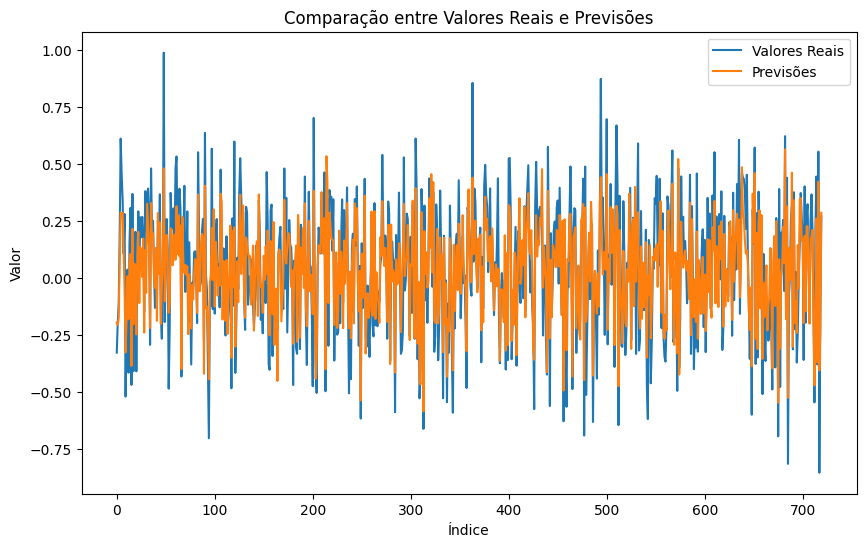

In [29]:
# Plotar os resultados
pl.figure(figsize=(10, 6))
pl.plot(test_y, label='Valores Reais')
pl.plot(predictions, label='Previsões')
pl.xlabel('Índice')
pl.ylabel('Valor')
pl.title('Comparação entre Valores Reais e Previsões')
pl.legend()
pl.show()
